In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [2]:
p = 100
Ntrain = 10
Ntest = 10

# Calculations

In [3]:
MassE = np.random.exponential(p,Ntrain)
cos = np.vectorize(math.cos)
acos = np.vectorize(math.acos)
sin = np.vectorize(math.sin)
sqrt = np.vectorize(math.sqrt)
theta = np.random.uniform(0,2*math.pi,Ntrain)
#phi = np.random.uniform(0,math.pi,Ntrain)
phi = acos(sin(theta))
PxE = p*(cos(theta))*(cos(phi))
PyE = p*(cos(theta))*(sin(phi))
PzE = p*(cos(phi))

TrainValues = np.ones(Ntrain*2)
TrainValues[:Ntrain] = 0
TrainValues = TrainValues.astype(int)

TestValues = np.ones(Ntest*2)
TestValues[:Ntest] = 0
TestValues = TestValues.astype(int)

Train = [[]]
for k in range(Ntrain):
    Train.append(np.array([PxE[k],PyE[k],PzE[k],MassE[k]]))


MassE = np.random.exponential(p,Ntest)
theta = np.random.uniform(0,2*math.pi,Ntest)
phi = np.random.uniform(0,math.pi,Ntest)
PxE = p*(cos(theta))*(cos(phi))
PyE = p*(cos(theta))*(sin(phi))
PzE = p*(cos(phi))

Test = [[]]
for k in range(Ntest):
    Test.append(np.array([PxE[k],PyE[k],PzE[k],MassE[k]]))

MassN = np.random.normal(p/2,math.sqrt(p),Ntrain)
theta = np.random.uniform(0,2*math.pi,Ntrain)
phi = np.random.uniform(0,math.pi,Ntrain)
PxN = p*(cos(theta))*(cos(phi))
PyN = p*(cos(theta))*(sin(phi))
PzN = p*(cos(phi))

for k in range(Ntrain):
    Train.append(np.array([PxN[k],PyN[k],PzN[k],MassN[k]]))


MassN = np.random.normal(p/2,math.sqrt(p),Ntest)
theta = np.random.uniform(0,2*math.pi,Ntest)
phi = np.random.uniform(0,math.pi,Ntest)
PxN = p*(cos(theta))*(cos(phi))
PyN = p*(cos(theta))*(sin(phi))
PzN = p*(cos(phi))

for k in range(Ntest):
    Test.append(np.array([PxN[k],PyN[k],PzN[k],MassN[k]]))

Train.pop(0)
Train = np.asarray(Train)
Test.pop(0)
Test = np.asarray(Test)

In [26]:
theta = np.random.uniform(0,2*math.pi,Ntrain)
#phi = np.random.uniform(0,math.pi,Ntrain)
phi = acos(sin(theta))
PxE = p*(cos(theta))*(cos(phi))
PyE = p*(cos(theta))*(sin(phi))
PzE = p*(cos(phi))
print(sqrt(PxE**2 + PyE**2 + PzE**2))

[100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]


In [5]:
print(pow(cos(theta),2)+pow(cos(phi),2))
print(cos(theta)**2+cos(phi)**2)

[1.10537997 1.10896453 1.48000103 0.83956023 0.33809386 1.62110252
 0.80609612 0.71414468 1.06352303 0.04790731]
[1.10537997 1.10896453 1.48000103 0.83956023 0.33809386 1.62110252
 0.80609612 0.71414468 1.06352303 0.04790731]


Text(0.5, 1.0, 'Expodential Distrubution')

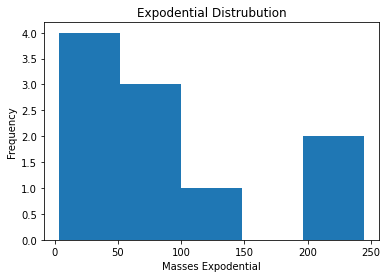

In [6]:
n, bins, patches = plt.hist(x=MassE, bins='auto')
plt.xlabel('Masses Expodential')
plt.ylabel('Frequency')
plt.title('Expodential Distrubution')

Text(0.5, 1.0, 'Normal Distrubution')

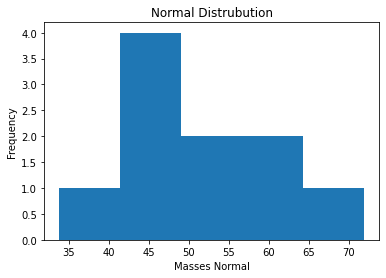

In [7]:
n, bins, patches = plt.hist(x=MassN, bins='auto')
plt.xlabel('Masses Normal')
plt.ylabel('Frequency')
plt.title('Normal Distrubution')

In [8]:
print(type(Train))
print(Train)
print(Train.shape)

<class 'numpy.ndarray'>
[[  8.21807586 -99.32000841  -8.24616028  74.50056412]
 [-31.96059905 -88.45152934  33.98304086  17.64784042]
 [ 19.99642374 -95.82731759 -20.42714471  18.35471137]
 [ 49.95275399  47.82689877  72.2309499  116.68110897]
 [ 28.06025752 -91.38383679 -29.3533017   26.0838153 ]
 [ 40.65825161 -20.89834067 -88.93911363 111.35486033]
 [ 49.45246883 -42.62075024 -75.74909225  65.31184773]
 [-45.75538737  29.8395306  -83.76184656  48.71462839]
 [ 43.40702152 -25.18406796 -86.49620341 137.61706021]
 [-24.91215748   6.64813257 -96.61877014  30.39425543]
 [ 41.54895964   8.20457453  98.10555345  44.68120917]
 [-45.03063593  63.5509437  -57.81488592  57.26591601]
 [ 31.60541615  63.82324761  44.37707265  34.46897978]
 [  1.94340418   2.26653189  65.09192908  46.01675072]
 [-20.17581603  85.00786622 -23.09255965  53.00343139]
 [-88.09066681  10.90230384 -99.24283181  56.94323146]
 [ -6.40422341   1.92453608 -95.76916326  46.04716034]
 [ 37.8194572    2.57670564  99.76870818 

In [9]:
print(type(TrainValues))
print(TrainValues)
print(TrainValues.shape)

<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
(20,)


In [10]:
class_names = ['Expodential','Normal']

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(4, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 4)                 0         
_________________________________________________________________
dense (Dense)                (None, 128)               640       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 898
Trainable params: 898
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(Train, TrainValues, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 336ms/step - loss: 1.8973 - accuracy: 0.8000
Epoch 2/10
1/1 [==============================] - 0s 2ms/step - loss: 1.6055 - accuracy: 0.8500
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 1.3563 - accuracy: 0.8500
Epoch 4/10
1/1 [==============================] - 0s 2ms/step - loss: 1.1106 - accuracy: 0.8500
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 0.8745 - accuracy: 0.8500
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6642 - accuracy: 0.8500
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 0.5881 - accuracy: 0.8500
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6081 - accuracy: 0.7500
Epoch 9/10
1/1 [==============================] - 0s 2ms/step - loss: 0.6008 - accuracy: 0.8000
Epoch 10/10
1/1 [==============================] - 0s 2ms/step - loss: 0.5445 - accuracy: 0.8000


In [15]:
test_loss, test_acc = model.evaluate(Train, TrainValues, verbose=2)

print('\nTest accuracy:', test_acc)


1/1 - 0s - loss: 0.4588 - accuracy: 0.8000

Test accuracy: 0.800000011920929


In [16]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(Test)

In [18]:
predictions[0]

array([0.99817216, 0.00182783], dtype=float32)

In [19]:
np.argmax(predictions[0])

0

In [20]:
print(predictions)

[[9.9817216e-01 1.8278299e-03]
 [9.9929941e-01 7.0052542e-04]
 [9.9843639e-01 1.5635518e-03]
 [4.9454349e-01 5.0545645e-01]
 [9.9100775e-01 8.9922510e-03]
 [1.0000000e+00 8.9586194e-10]
 [9.9999392e-01 6.0383823e-06]
 [6.4516142e-11 1.0000000e+00]
 [9.9999881e-01 1.2088623e-06]
 [1.0000000e+00 6.7418557e-14]
 [1.3249358e-12 1.0000000e+00]
 [9.9502581e-01 4.9741375e-03]
 [6.6843214e-08 9.9999988e-01]
 [8.1323117e-01 1.8676883e-01]
 [9.9999845e-01 1.5035235e-06]
 [1.1165436e-01 8.8834566e-01]
 [1.7900439e-07 9.9999976e-01]
 [9.9992669e-01 7.3249874e-05]
 [9.9852425e-01 1.4758194e-03]
 [3.7694994e-01 6.2305009e-01]]


In [21]:
ErrorExp = np.average(predictions[:Ntest])
print(ErrorExp)

0.5


In [22]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(2))
  plt.yticks([])
  thisplot = plt.bar(range(2), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

def plot_predicted_array(i, predictions_array):
  plt.grid(False)
  plt.xticks(range(2))
  plt.yticks([])
  thisplot = plt.bar(range(2), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

In [23]:
i = 1000
plot_value_array(i, predictions[i],  TestValues)

IndexError: index 1000 is out of bounds for axis 0 with size 20

In [ ]:
i = 950000
plot_predicted_array(i, predictions[i])